# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

# imports

import pandas as pd
import numpy as np
from scipy.stats import trim_mean   # conda install scipy
from statsmodels import robust      # conda install -c conda-forge statsmodels 
import wquantiles                   # pip install wquantiles

import seaborn as sns
import matplotlib.pylab as plt
import random
from matplotlib.ticker import PercentFormatter

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
dice_faces = list(range(1,7))
dice_faces

roll_the_dice = pd.DataFrame([random.choices(dice_faces) for i in range(1,11)])
roll_the_dice.columns = ['Result']
roll_the_dice

,Result
0,6
1,4
2,3
3,5
4,6
5,5
6,3
7,1
8,3
9,6


#### 2.- Plot the results sorted by value.

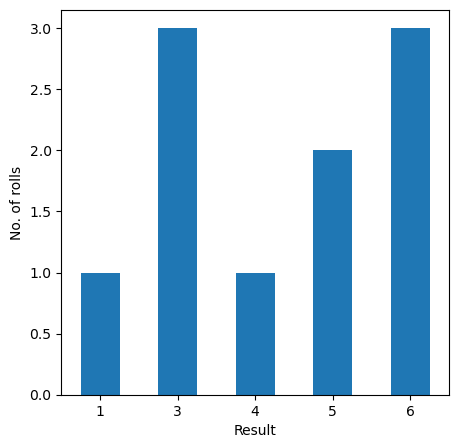

In [3]:
# your code here

# Cuenta la frecuencua de los resultados (.value_counts) y ordena por el valor de los dados (.sort_index)
ax = roll_the_dice['Result'].value_counts().sort_index().plot.bar(figsize=(5, 5)) 

ax.set_xlabel('Result') # Resultado de la cara del dado
ax.set_ylabel('No. of rolls') # Número de veces que se repite el resultado del dado
ax.tick_params(axis='x', rotation=0) # Ajustar los paramétros del eje x para rotarlos en 0 grados
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [4]:
# your code here (https://www.youtube.com/watch?v=NpEPEIMvItw&ab_channel=RocioChavezCienciadeDatos)

freq = roll_the_dice.value_counts().reset_index()
freq['Result'] = freq['Result'].astype("str") # Categorizar los resultados para que el sort se base en las frecuencias
freq

,Result,count
0,3,3
1,6,3
2,5,2
3,1,1
4,4,1


In [5]:
freq_df = freq.rename(columns={"count":"Freq_abs"})
freq_df

,Result,Freq_abs
0,3,3
1,6,3
2,5,2
3,1,1
4,4,1


In [6]:
# Creamos el ratio frecuencia relativa, dividiendo cada freq absoluta por resultado entre el número de caras del dado x 100%

freq_df["Freq_rel_%"] = (100 * freq_df["Freq_abs"] / freq_df["Freq_abs"].sum()).round(2)
freq_df

,Result,Freq_abs,Freq_rel_%
0,3,3,30.0
1,6,3,30.0
2,5,2,20.0
3,1,1,10.0
4,4,1,10.0


In [7]:
freq_df["Freq_rel_%"].values

array([30., 30., 20., 10., 10.])

In [8]:
# Valores de frecuencias relativas "acumuladas"
freq_rel_val = freq_df["Freq_rel_%"].values # array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
accumulate = []
counter = 0
for i in freq_rel_val: # Para cada elemento de freq_rel_val == array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
    counter += i # (0 + 50.00, 50.00 + 33.33 ... 150.00 + 16.67)
    accumulate.append(counter)
freq_df["Freq_rel_%_acum"] = accumulate # Se crea la nueva columna con los valores guardados en accumulate
freq_df

,Result,Freq_abs,Freq_rel_%,Freq_rel_%_acum
0,3,3,30.0,30.0
1,6,3,30.0,60.0
2,5,2,20.0,80.0
3,1,1,10.0,90.0
4,4,1,10.0,100.0


#### Frequency distribution plot

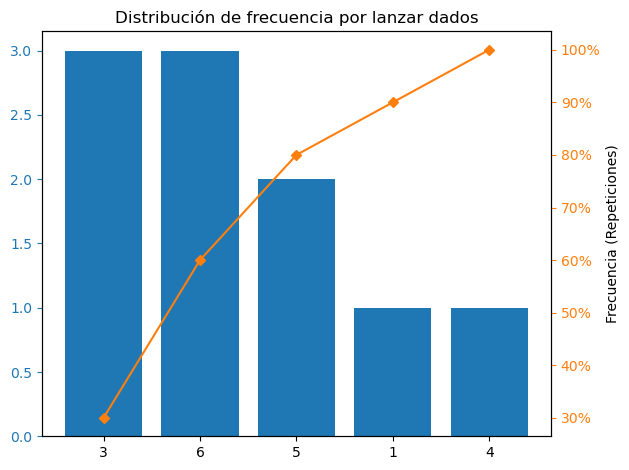

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title('Distribución de frecuencia por lanzar dados')

ax.bar(freq_df["Result"],freq_df["Freq_abs"], color="C0")

ax2 = ax.twinx()
ax2.plot(freq_df.index, freq_df["Freq_rel_%_acum"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticks(freq_df["Result"])  # Utiliza set_xticks en lugar de set_xticklabels
ax.set_xticklabels(freq_df["Result"], rotation=0)

plt.xlabel("Caras del dado")
plt.ylabel("Frecuencia (Repeticiones)")

fig.tight_layout()
plt.show()

#### Results sorted by value plot

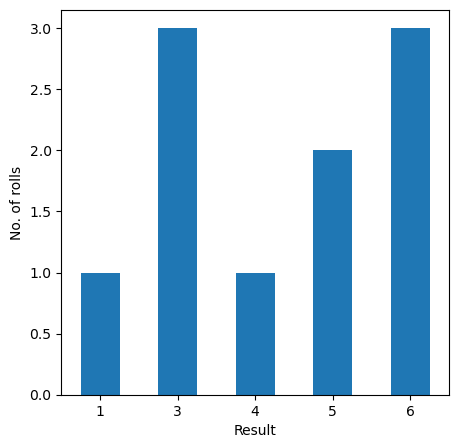

In [10]:
# your code here

# Cuenta la frecuencua de los resultados (.value_counts) y ordena por el valor de los dados (.sort_index)
ax = roll_the_dice['Result'].value_counts().sort_index().plot.bar(figsize=(5, 5)) 

ax.set_xlabel('Result') # Resultado de la cara del dado
ax.set_ylabel('No. of rolls') # Número de veces que se repite el resultado del dado
ax.tick_params(axis='x', rotation=0) # Ajustar los paramétros del eje x para rotarlos en 0 grados
plt.show()

### What is the relation between this plot and the plot above?

In [11]:
"""
1. Results sorted by value plot: Gives you information about the dice face with more repetitions
2. Frequency distribution plot: I did a Pareto chart, which gives you information about the 80% of results in which
    I have to focus one. (e.g: If I had a bet on money, I would certainly choose 5 or 1.)
"""

'\n1. Results sorted by value plot: Gives you information about the dice face with more repetitions\n2. Frequency distribution plot: I did a Pareto chart, which gives you information about the 80% of results in which\n    I have to focus one. (e.g: If I had a bet on money, I would certainly choose 5 or 1.)\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
dice_mean = roll_the_dice['Result'].sum() / len(roll_the_dice['Result'])
dice_mean

4.2

In [13]:
roll_the_dice

,Result
0,6
1,4
2,3
3,5
4,6
5,5
6,3
7,1
8,3
9,6


In [14]:
roll_the_dice['Result'].mean()

4.2

In [15]:
# your code here

def mean_sum(dataframe, column):
    row = 0
    col = 0
    for row, col_value in enumerate(dataframe[column]):
        col += col_value
        row += 1
    return col / row
mean_sum(roll_the_dice,'Result')

4.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [16]:
freq = roll_the_dice.value_counts().reset_index()
freq['Result'] = freq['Result'].astype("str")
freq_df = freq.rename(columns={"count":"Freq_abs"})
freq_df

,Result,Freq_abs
0,3,3
1,6,3
2,5,2
3,1,1
4,4,1


In [17]:
# your code here

def mean_sum(dataframe, column):
    row = 0
    col = 0
    for row, col_value in enumerate(dataframe[column]):
        col += col_value
        row += 1
    return col / row
mean_sum(freq_df,'Freq_abs')

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [18]:
# your code here


def medianing(dataframe, column):
    np.sort(dataframe[column])
    col_length = len(dataframe[column])
    if col_length % 2 != 0:        
        return dataframe[column][(col_length // 2) + 1]
    elif col_length % 2 == 0:
        return (dataframe[column][col_length // 2] + dataframe[column][(col_length // 2) + 1]) / 2

medianing(freq_df,'Freq_abs')

1

# Pendiente

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [19]:
# your code here

def quartiling(dataframe, column):
    np.sort(dataframe[column])
    q_keys = ['Q1','Q2','Q3','Q4']
    quarts = {}
    for key, value in q_keys, dataframe[column]:
    


IndentationError: expected an indented block (2086060837.py, line 8)

In [ ]:
q_keys = ['Q1','Q2','Q3','Q4']
quarts = []
for key in q_keys:
    quarts.append(key)
print(quarts)    

In [ ]:
q_values = []
np.sort(freq_df['Freq_abs'])
# Q1 es la mediana de la mitad inferior de la lista
q_values.append(medianing(freq_df,'Freq_abs')/2) 
# Q2 es la mediana de toda la lista
q_values.append(medianing(freq_df,'Freq_abs')) 
# Q3 es la mediana de la mitad superior de la lista
q_values.append((len(freq_df['Freq_abs']) - medianing(freq_df,'Freq_abs')) / 2) 
# Q4 es el doble de la mediana de toda la lista
q_values.append(medianing(freq_df, 'Freq_abs') * 2)

print(q_values)


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [20]:
# your code here

roll_the_dice_100 = pd.read_csv('../data/roll_the_dice_hundred.csv',index_col=0)
roll_the_dice_100['roll'] = roll_the_dice_100['roll'].astype('str')
roll_the_dice_100

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


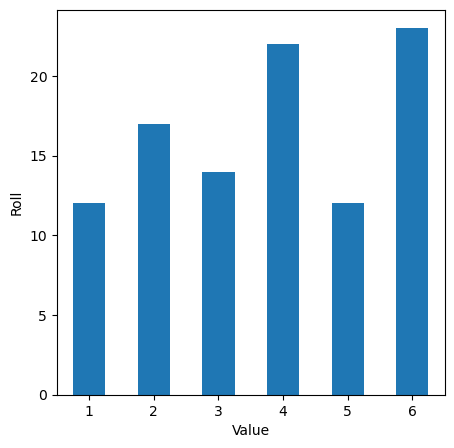

In [21]:
# Cuenta la frecuencua de los resultados (.value_counts) y ordena por el valor de los dados (.sort_index)
ax = roll_the_dice_100['value'].value_counts().sort_index().plot.bar(figsize=(5, 5)) 

ax.set_xlabel('Value') # Resultado de la cara del dado
ax.set_ylabel('Roll') # Número de veces que se repite el resultado del dado
ax.tick_params(axis='x', rotation=0) # Ajustar los paramétros del eje x para rotarlos en 0 grados
plt.show()

In [22]:
"""
The number six dice face is the one repeating the most, followed by No.4 and No.2
"""

'\nThe number six dice face is the one repeating the most, followed by No.4 and No.2\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [23]:
# your code here
def mean_sum(dataframe, column):
    row = 0
    col = 0
    for row, col_value in enumerate(dataframe[column]):
        col += col_value
        row += 1
    return col / row
mean_sum(roll_the_dice_100,'value')

3.74

#### 3.- Now, calculate the frequency distribution.


In [24]:
# your code here

freq100 = roll_the_dice_100['value'].value_counts().reset_index()
freq100['value'] = freq100['value'].astype('str')
freq100_df = freq100.rename(columns={"count":"Freq_abs"})
freq100_df

,value,Freq_abs
0,6,23
1,4,22
2,2,17
3,3,14
4,1,12
5,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [25]:
# your code here

# np.shape(freq100_df) # ((6, 2))
freq100_df['Freq_rel_%'] = (100 * freq100_df['Freq_abs'] / freq100_df['Freq_abs'].sum()).round(2)
freq100_df

,value,Freq_abs,Freq_rel_%
0,6,23,23.0
1,4,22,22.0
2,2,17,17.0
3,3,14,14.0
4,1,12,12.0
5,5,12,12.0


In [26]:
freq100_df["Freq_rel_%"].values

array([23., 22., 17., 14., 12., 12.])

In [27]:
# Valores de frecuencias relativas "acumuladas"
freq_rel_val = freq100_df["Freq_rel_%"].values # array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
accumulate = []
counter = 0
for i in freq_rel_val: # Para cada elemento de freq_rel_val == array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
    counter += i # (0 + 50.00, 50.00 + 33.33 ... 150.00 + 16.67)
    accumulate.append(counter)
freq100_df["Freq_rel_%_acum"] = accumulate # Se crea la nueva columna con los valores guardados en accumulate
freq100_df

,value,Freq_abs,Freq_rel_%,Freq_rel_%_acum
0,6,23,23.0,23.0
1,4,22,22.0,45.0
2,2,17,17.0,62.0
3,3,14,14.0,76.0
4,1,12,12.0,88.0
5,5,12,12.0,100.0


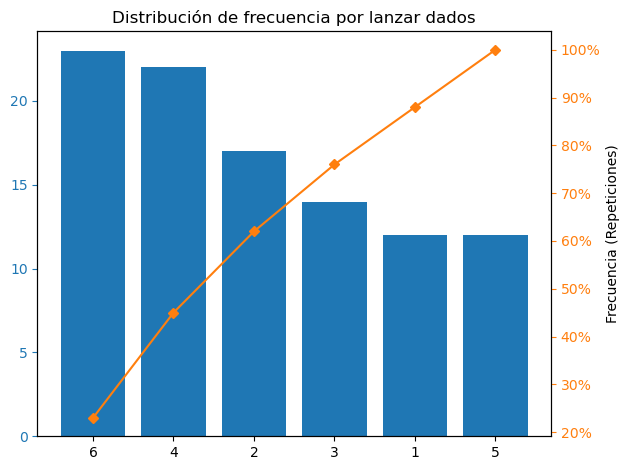

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title('Distribución de frecuencia por lanzar dados')

ax.bar(freq100_df["value"],freq100_df["Freq_abs"], color="C0")

ax2 = ax.twinx()
ax2.plot(freq100_df.index, freq100_df["Freq_rel_%_acum"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticks(freq100_df["value"])  # Utiliza set_xticks en lugar de set_xticklabels
ax.set_xticklabels(freq100_df["value"], rotation=0)

plt.xlabel("Caras del dado")
plt.ylabel("Frecuencia (Repeticiones)")

fig.tight_layout()
plt.show()

In [ ]:
"""
El 80% de los resultados corresponden a las caras de los dados con más repeticiones. El valor de 6 con mayor número
de repeticiones, seguido del 4, 2 y 3.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [30]:
# your code here

roll_the_dice_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv',index_col=0)
roll_the_dice_1000

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4
998,998,3


In [31]:
freq1000 = roll_the_dice_1000['value'].value_counts().reset_index()
freq1000['value'] = freq1000['value'].astype('str')
freq1000_df = freq1000.rename(columns={"count":"Freq_abs"})
freq1000_df

,value,Freq_abs
0,1,175
1,3,175
2,4,168
3,2,167
4,6,166
5,5,149


In [33]:
# np.shape(freq1000_df) # ((6, 2))
freq1000_df['Freq_rel_%'] = (100 * freq1000_df['Freq_abs'] / freq1000_df['Freq_abs'].sum()).round(2)
freq1000_df

,value,Freq_abs,Freq_rel_%
0,1,175,17.5
1,3,175,17.5
2,4,168,16.8
3,2,167,16.7
4,6,166,16.6
5,5,149,14.9


In [35]:
freq1000_df["Freq_rel_%"].values

array([17.5, 17.5, 16.8, 16.7, 16.6, 14.9])

In [36]:
# Valores de frecuencias relativas "acumuladas"
freq_rel_val = freq1000_df["Freq_rel_%"].values # array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
accumulate = []
counter = 0
for i in freq_rel_val: # Para cada elemento de freq_rel_val == array([50.  , 33.33, 33.33, 16.67, 16.67, 16.67])
    counter += i # (0 + 50.00, 50.00 + 33.33 ... 150.00 + 16.67)
    accumulate.append(counter)
freq1000_df["Freq_rel_%_acum"] = accumulate # Se crea la nueva columna con los valores guardados en accumulate
freq1000_df

,value,Freq_abs,Freq_rel_%,Freq_rel_%_acum
0,1,175,17.5,17.5
1,3,175,17.5,35.0
2,4,168,16.8,51.8
3,2,167,16.7,68.5
4,6,166,16.6,85.1
5,5,149,14.9,100.0


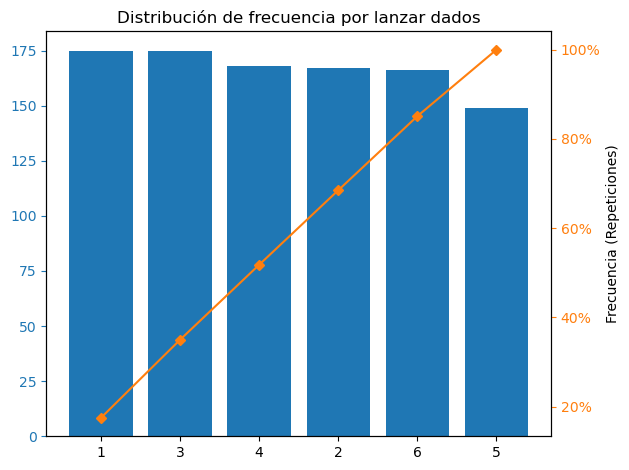

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_title('Distribución de frecuencia por lanzar dados')

ax.bar(freq1000_df["value"],freq1000_df["Freq_abs"], color="C0")

ax2 = ax.twinx()
ax2.plot(freq1000_df.index, freq1000_df["Freq_rel_%_acum"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.set_xticks(freq1000_df["value"])  # Utiliza set_xticks en lugar de set_xticklabels
ax.set_xticklabels(freq1000_df["value"], rotation=0)

plt.xlabel("Caras del dado")
plt.ylabel("Frecuencia (Repeticiones)")

fig.tight_layout()
plt.show()

In [ ]:
"""
El 80% de los resultados excluye a la cara del dado valor 5, al igual que en el caso anterior.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
ages_population2

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here
ages_population3 = pd.read_csv('../data/ages_population3.csv')
ages_population3

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""